# TP 2: Résolution d'équations non linéaires
## PHY-3500: Physique numérique (H2021) - 26 février 2021


Mélissa Cinq-Mars (111 179 946)

Pierre-Olivier Janvier (111 187 987)

Maxence Larose (111 188 447)

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sym
import pandas as pd

## Le potentiel de Lennard-Jones

### Question 1

On cherche à exprimer les points de rebroussement en fonction de l'énergie $\epsilon_n$. On sait qu'il existe deux points de rebroussement, notés $r_-$ et $r_+$, et qu'ils correspondent aux positions où l'impulsion est nulle (positions où les noyaux changent de direction). L'impulsion linéaire local $p(r)$ est donnée par

$$ p(r)=\pm\left[2 \mu(E_n - V(r))\right]^{1 / 2}. $$

En utilisant les variables sans dimension suivantes

$$ \epsilon_n = \frac{E_n}{V_{0}} \quad, \quad x=\frac{r}{\sigma} \quad, \quad \gamma=\left(\frac{2 \mu \sigma^{2} V_{0}}{\hbar^{2}}\right)^{1 / 2}, $$

il est possible d'écrire l'impulsion linéaire local sous la forme

$$ p(x)=\pm\left[2 \mu V_0 (\epsilon_n - v(x))\right]^{1 / 2}, $$

où on a

$$ v(x)=4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right]. $$

Les points de rebroussement $x_-$ et $x_+$ sont donc déterminés par l'équation $ p(x) = 0 $, soit

$$
p(x) = \pm\left[2 \mu V_0 \left(\epsilon_n - 4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right]\right)\right]^{1 / 2} = 0, \\
\implies \epsilon_n = 4\left[\left(\frac{1}{x}\right)^{12}-\left(\frac{1}{x}\right)^{6}\right], \\
\implies \frac{\epsilon_n}{4}x^{12}  + x^6 - 1 = 0. \\
$$

En utilisant la substitution $y = x^6$, on a que

$$
\frac{\epsilon_n}{4}y^{2}  + y - 1 = 0,
$$

ce qui nous donne les solutions suivantes en utilisant la formule quadratique :

$$
y = \frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n} \quad \text{et} \\
y = -\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n},
$$

avec $\epsilon_n \neq 0$. Si $\epsilon_n = 0$, on a que $y = 1$, mais le cas $\epsilon_n = 0$ n'est pas intéressant puisqu'il signifie que l'énergie $E = 0$. En revenant à une solution avec $x$, on a que

$$
x_- = \left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \\
x_+ = \left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6}.
$$

Il est important de noter que l'on désire obtenir des solutions réelles et positives pour les valeurs de $x_-$ et $x_+$ et on ne considère donc pas les racines complexes. On doit s'assurer que notre choix de $x_-$ et $x_+$ fait en sorte que $x_+ > x_-$. Pour ce faire, on doit d'abord déterminer le domaine de la valeur de $\epsilon_n$, soit si $\epsilon_n$ est un nombre positif ou négatif dans notre problème. On remarque que le point de rebroussement $x_+$ est un nombre réel pour $\epsilon_n < 0$ et un nombre complexe pour $\epsilon_n > 0$. On se doute donc que $\epsilon_n$ doit être négatif. Comme confirmation, on peut observer la courbe du potentiel réalisée par le bloc de code suivant.

In [2]:
def get_dimensionless_potential(x):
    return 4*(x**-12 - x**-6)

def show_dimensionless_potential():
    x = np.linspace(0.93, 2, 1000)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    line, = ax.plot(x, get_dimensionless_potential(x), color='k', lw=2)
    ax.set_title("Potentiel adimensionnel de Lennard-Jones", fontsize=14)

    ax.set_xlabel("Position adimensionnelle $x$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Potentiel adimensionnel $v(x)$ [-]", fontsize=14)
    ax.minorticks_on()

    plt.grid()
    plt.show()
    plt.close(fig)

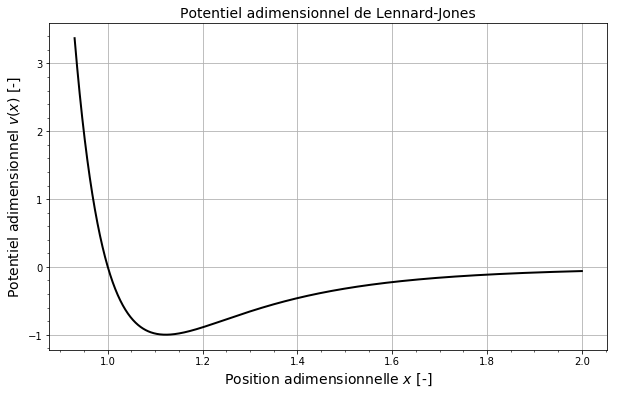

In [3]:
show_dimensionless_potential()

On remarque donc que le potentiel $v(x)$ est contraint de $[-1, 0[$ pour tout $x > 1$. Comme les points de rebroussement sont déterminés par l'équation $p(x) = 0$ donc $\epsilon_n = v(x)$, on a que 

$$ \epsilon_n \in [-1, 0[. $$

On doit maintenant s'assurer que notre choix de $x_-$ et $x_+$ fait en sorte que $x_+ > x_-$ sur ce domaine. Le bloc de code suivant permet d'observer les positions des points de rebroussement $x_-$ et $x_+$ obtenues en fonction du paramètre $\epsilon_n$.

In [4]:
def get_xmin(eps):
    return (2*((eps + 1)**(1/2) - 1)/eps)**(1/6)

def get_xmax(eps):
    return (-2*((eps + 1)**(1/2) + 1)/eps)**(1/6)

def show_turning_points():
    eps = np.linspace(-1, -0.01, 1000)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    line1, = ax.plot(eps, get_xmin(eps), color='b', lw=2, label="Point de rebroussement $x_-$")
    line2, = ax.plot(eps, get_xmax(eps), color='r', lw=2, label="Point de rebroussement $x_+$")
    ax.set_title("Position adimensionnel des points de rebroussement en fonction de l'énergie", fontsize=14)

    ax.set_xlabel("Énergie adimensionnelle $\epsilon_n$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Position adimensionnel $x$ [-]", fontsize=14)
    ax.minorticks_on()
    ax.legend(fontsize=14)

    plt.grid()
    plt.show()
    plt.close(fig)

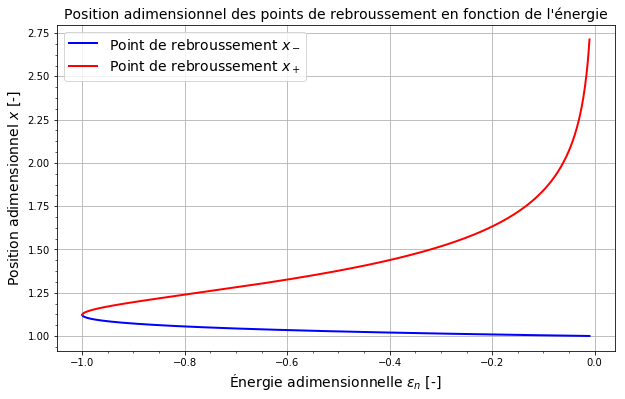

In [5]:
show_turning_points()

Notre choix de $x_-$ et $x_+$ fait bien en sorte que $x_+ > x_-$ sur le domaine de validité de $\epsilon_n$. La solution finale pour les points de rebroussement en fonction de $\epsilon_n$ est donc
$$
x_-(\epsilon_n) = \left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \quad x_+(\epsilon_n) = \left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6},
$$
ou plutôt
$$
r_-(\epsilon_n) = \sigma\left[\frac{2\left((\epsilon_n + 1)^{1/2} - 1\right)}{\epsilon_n}\right]^{1/6} \quad \text{et} \quad r_+(\epsilon_n) = \sigma\left[-\frac{2\left((\epsilon_n + 1)^{1/2} + 1\right)}{\epsilon_n}\right]^{1/6}.
$$


### Question 2

In [6]:
def get_quasi_classical_action(eps, gamma, n):
    assert eps < 0 and eps > -1, r"Attention! Le domaine de validité de l'énergie adimensionnelle est [-1 < epsilon < 0]"
    
    x_min: float = get_xmin(eps)
    x_max: float = get_xmax(eps)
    
    integrand = lambda x, eps: (eps - get_dimensionless_potential(x))**(1/2)
    
    action: float = integrate.quad(func=integrand, a=x_min, b=x_max, args=(eps,))[0]
    
    return gamma*action - (n + 1/2)*np.pi


def bissection(func, a, b, error_target, **func_kwargs):
    
    f_a = func(a, **func_kwargs)
    f_b = func(b, **func_kwargs)
    assert f_a*f_b <= 0, "La fonction évaluée aux deux points choisis sont de même signe"

    err = np.inf
    
    while err > error_target:
        mid = 1/2*(a + b)
        f_a = func(a, **func_kwargs)
        f_b = func(b, **func_kwargs)
        f_mid = func(mid, **func_kwargs)
        
        if f_a * f_mid < 0:
            b = mid
            a = a
        
        elif f_b * f_mid < 0:
            a = mid
            b = b
            
        elif mid == 0:
            print("Found the exact solution")
            return mid
        
        else:
            return None
        
        err = abs(b - a)
        
    return mid


### Question 3

In [7]:
gamma_O2: float = 150
nb_state: float = 20
n_states: list = list(range(nb_state))

eps_1 = -0.99 
eps_2 = -0.01

states_title = "États vibrationels [-]"
dimensionless_energy_title = "Énergie adimensionnelle [-]"
x_min_title = "Point de rebroussement inférieur [-]"
x_max_title = "Point de rebroussement supérieur [-]"
dimensionless_potential_title = "Potentiel adimensionnel [-]"

columns = [states_title, dimensionless_energy_title, x_min_title, x_max_title, dimensionless_potential_title]
results = pd.DataFrame(columns=columns)

for n in n_states:
    dimensionless_energy = bissection(func=get_quasi_classical_action, 
                                      a=eps_1, 
                                      b=eps_2, 
                                      error_target=10**-8, 
                                      gamma=gamma_O2, 
                                      n=n
                                     )
    
    x_min = get_xmin(dimensionless_energy)
    x_max = get_xmax(dimensionless_energy)
    potential = get_dimensionless_potential(x=x_min)
    
    units = {
        states_title: f"{n:.0f}",
        dimensionless_energy_title: dimensionless_energy,
        x_min_title: x_min,
        x_max_title: x_max,
        dimensionless_potential_title: potential
    }
    
    results = results.append(units, ignore_index=True, )
    
display(results)


,États vibrationels [-],Énergie adimensionnelle [-],Point de rebroussement inférieur [-],Point de rebroussement supérieur [-],Potentiel adimensionnel [-]
0,0,-0.964764,1.090736,1.162037,-0.964764
1,1,-0.896672,1.071511,1.197405,-0.896672
2,2,-0.831703,1.059960,1.225723,-0.831703
3,3,-0.769801,1.051490,1.251628,-0.769801
4,4,-0.710907,1.044787,1.276479,-0.710907
5,5,-0.654959,1.039259,1.300920,-0.654959
6,6,-0.601897,1.034581,1.325333,-0.601897
7,7,-0.551659,1.030553,1.349982,-0.551659
8,8,-0.504181,1.027040,1.375070,-0.504181
9,9,-0.459400,1.023948,1.400771,-0.459400


In [8]:
def show_energy():
    x = np.linspace(0.98, 2, 1000)
    
    nb_state: float = 20
    n_states: list = list(range(nb_state))
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    line1, = ax.plot(x, get_dimensionless_potential(x), color='k', lw=2)
    
    for n in n_states:
        row_n = results.loc[results[states_title] == str(n)]
        x_min = row_n[x_min_title].item()
        x_max = row_n[x_max_title].item()
        dimensionless_potential = row_n[dimensionless_potential_title].item()
        line2, = ax.plot([x_min, x_max], [dimensionless_potential]*2, lw=2, label=f"État {n:.0f}")
    
    ax.set_title(f"Potentiel adimensionnel de Lennard-Jones avec les différentes \n énergies \
pour {n_states[-1] + 1:.0f} états", fontsize=14)
    ax.set_xlabel("Position adimensionnelle $x$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Potentiel adimensionnel $v(x)$ [-]", fontsize=14)
    ax.minorticks_on()
    ax.legend()

    plt.grid()
    plt.show()
    plt.close(fig)


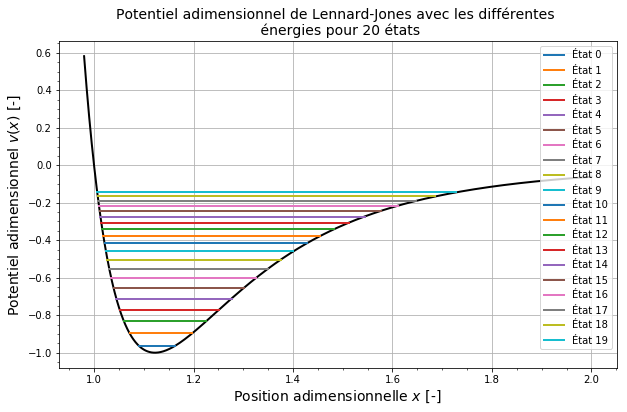

In [9]:
show_energy()

### Question 4

In [23]:
#Méthode de la secante 

eps_1 = -0.99 
eps_2 = -0.01

def secante(func, x0, x1, error_target, **func_kwargs):
    f1 = func(x0, **func_kwargs)
    while abs(x1-x0)>error_target:
        f0, f1 = f1, func(x1, **func_kwargs)
        x0, x1 = x1, x1-f1*(x1-x0)/(f1-f0)
        
    return x0
        
print(secante(func=get_quasi_classical_action, x0=eps_1, x1=eps_2, error_target=10**-8, gamma=gamma_O2, n=n))
        

-0.1449412020655395


## Pandémie et relaxation

### Question 5

Dans cette section, un algorithme de relaxation pour l'équation du pourcentage de la population infecté en termes
de la pandémie en fonction du nombre de reproduction de base est réalisé.

In [10]:
def pop_percentage(R0):
    """
    Calcule le pourcentage de la population infecté en termes de la pandémie.
    
    Parameters
    ----------
    R0: Nombre de reproduction de base de la pandémie. (float)
    
    Returns
    -------
    p (float), prec (float), p_list(list)  
    """
    p_list = []
    p  = 0.5
    p_prev = p
    p  = 1-np.exp(-R0 * p)
    prec = abs(p-p_prev)
    
    p_list.append(p)
    
    
    while prec >= 0.000001:
        p_prev = p
        p  = 1-np.exp(-R0 * p)
        p_list.append(p)
        prec = abs(p-p_prev)
   
        
    return (p,prec,p_list)

Dans cette section, la fonction fait à la section précédente est utilisée afin d'évaluer la population infecté
selon plusieurs nombre de reproduction de base pour finalement en tracer un graphique.

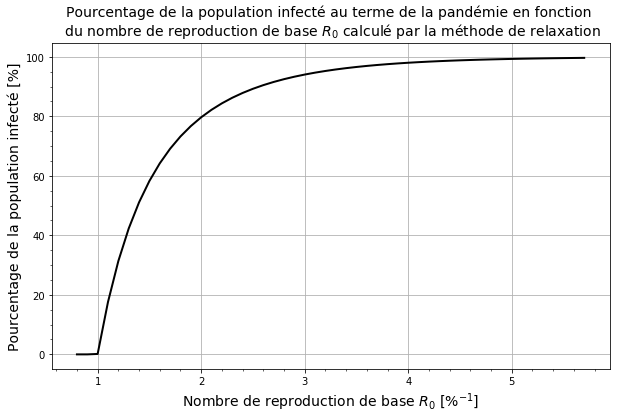

moyenne de la précision pour chacun des R0 =  4.874866091175712e-07


In [11]:
min_R0 = 0.8
max_R0 = 5.7
step = 0.1

def plot_pop_percentage_R0(min_R0,max_R0,step):
    """
    Évalue le pourcentage de population infecté pour une plage de nombre de reproduction de base
    et trace le graphique correspondant.
    
    Parameters
    ----------
    min_R0: valeur du nombre de reproduction de base minimal à évaluer [%$^{-1}$] (float)
    max_R0: valeur du nombre de reproduction de base maximal à évaluer [%$^{-1}$] (float)
    step: valeur des incréments à tester pour l'intervalle défini par les deux autres paramètres. (float)

    Returns
    -------
    prec_moy (float)
    None
    """
    R0_vec = np.arange(min_R0,max_R0+step,step)
    pop = []
    prec = []
    for R0 in R0_vec:
        p = pop_percentage(R0)[0]
        prec.append(pop_percentage(R0)[1])
        pop.append(p)
        
    pop = 100*np.asarray(pop)    
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(R0_vec, pop, color='k', lw=2)
    ax.set_title("Pourcentage de la population infecté au terme de la pandémie en fonction \n"
                 " du nombre de reproduction de base $R_{0}$ calculé par la méthode de relaxation", fontsize=14)

    ax.set_xlabel("Nombre de reproduction de base $R_{0}$ [%$^{-1}$]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Pourcentage de la population infecté [%]", fontsize=14)
    ax.minorticks_on()

    plt.grid()
    plt.show()
    plt.close(fig)
    
    prec_moy = np.mean(prec)
    
    return prec_moy
    
    
prec = plot_pop_percentage_R0(min_R0,max_R0,step)

print("moyenne de la précision pour chacun des R0 = ",prec)



## Pandémie et relaxation accélérée

### Question 6

Il faut démontrer que l'erreur sur l'estimé $x'$ est donné par

\begin{align}
\tag{1}
\epsilon^{\prime}=\frac{x-x^{\prime}}{1-\frac{1}{(1+\omega) f^{\prime}(x)-\omega}}.
\end{align}

Pour ce faire, l'équation (6.81) tirée du Newman 

\begin{align}
\tag{2}
\epsilon^{\prime}=\epsilon f'(x^*)
\end{align}

est utilisée. Donc, on sait que

\begin{align}
\tag{3}
x^*= x + \epsilon
\end{align}

où $x^*$ est la solution de l'équation à solutionner. Ainsi, en remplaçant (2) dans (3), on obtient

\begin{align}
\tag{4}
x^*= x+\frac{\epsilon^{\prime}}{f^{\prime}\left(x^{*}\right)}.
\end{align}

De plus, on sait aussi, naturellement, que

\begin{align}
\tag{5}
x^*= x' + \epsilon'.
\end{align}

Alors, en remplaçant (5) dans (4), on obtient

\begin{align}
\tag{6}
x'+ \epsilon'= x +\frac{\epsilon^{\prime}}{f^{\prime}\left(x^{*}\right)}.
\end{align}

Il est ensuite possible de réarranger l'expression (6) de la manière suivante pour arriver à l'expression (6.83) du Newman. Tout d'abord, en regroupant les termes en $\epsilon'$,

\begin{align}
\epsilon' - \frac{\epsilon^{\prime}}{f^{\prime}\left(x^{*}\right)}= x - x',
\end{align}

ensuite, en faisant une mise en évidence simple,

\begin{align}
\epsilon' (1 - \frac{1}{f^{\prime}\left(x^{*}\right)})= x - x'
\end{align}

et finalement, en isolant $\epsilon$',

\begin{align}
\tag{7}
\epsilon' = \frac{x - x'}{(1 - \frac{1}{f^{\prime}\left(x^{*}\right)})}.
\end{align}

Afin de terminer la démonstration, il faut trouver l'expression de $f^{\prime}\left(x^{*}\right)$. Dans l'énoncée de la question 6, on dit que f(x) = x' et que 

\begin{align}
x' = (1+\omega) f(x)-\omega x
\end{align}

ce qui peut être dérivé pour obtenir

\begin{align}
\tag{8}
f'(x) = (1+\omega) f^{\prime}(x)-\omega.
\end{align}

On conclu alors la démonstration en remplaçant l'équation (8) dans l'équation (7) ce qui donne l'expression (1) qui est de

\begin{align}
\tag{1}
\epsilon^{\prime}=\frac{x-x^{\prime}}{1-\frac{1}{(1+\omega) f^{\prime}(x)-\omega}}.
\end{align}

si la valeur de x est près de $x^*$ ce qui permet de poser que $f^{\prime}(x)$ $\simeq$ $f^{\prime}(x^*)$. CQFD

### Question 7

Dans cette section, l'algorithme réalisé à la question 5 est utilisé pour trouver le nombre d'itérations nécessaire à la convergence pour un $R_0$ de 2.

In [12]:
(p,prec,p_list) = pop_percentage(2)
print("Le nombre d'itérations nécessaire à la convergence est de", len(p_list), "pour une précision d'au moins 10^{-6}.")

Le nombre d'itérations nécessaire à la convergence est de 16 pour une précision d'au moins 10^{-6}.


### Question 8 

Dans cette section, l'algorithme réalisé à la section 5 est refait pour faire usage de la méthode de relaxation accélérée.

In [13]:
def acc_pop_percentage(R0, omega):
    """
    Calcule le pourcentage de la population infecté en termes de la pandémie avec la méthode de relaxation accélérée.
    
    Parameters
    ----------
    R0: Nombre de reproduction de base de la pandémie. (float)
    omega: paramètre d'accélération de la relaxation. (float)
    
    Returns
    -------
    p (float), prec (float), p_list(list)  
    """
    p_list = []
    p  = 0.5
    p_prev = p
    
    p  = 1-np.exp(-R0 * p)
    
    p_next = (1+omega)*p-(omega*p_prev)
    
    prec = abs(p-p_prev)
    
    p_list.append(p)
    
    
    while prec >= 0.000001:
        
        p_prev = p
        
        p  = 1-np.exp(-R0 * p_next)
        
        p_next = (1+omega)*p-(omega*p_next)
        
        p_list.append(p)
        
        prec = abs(p-p_prev)
        
    return (p,prec,p_list)

Dans cette section l'algorithme de la section précédente est utilisé pour optimiser la valeur de $\omega$ de la méthode de relaxation accéléré pour un $R_0$ de 2.

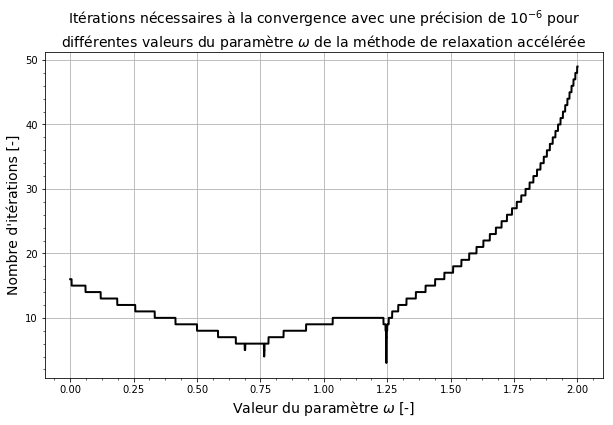

Moyenne de la précision pour chacun des omega testés =  5.843736507487931e-07
Valeur(s) de omega optimale(s) trouvée(s) = [1.24652 1.24653] pour obtenir un nombre d'itérations minimal de 3 .


In [14]:
def plot_acc_pop_percentage_w(R0, min_omega,max_omega,step):
    """
    Évalue le pourcentage de population infecté pour une plage du paramètre omega de la méthode de relaxation accélérée
    et trace un graphique permettant d'optimiser la résolution de l'équation.
    
    Parameters
    ----------
    R0: valeur du nombre de reproduction de base à évaluer [%$^{-1}$] (float)
    min_omega: valeur du paramètre omega minimal à évaluer [-] (float)
    max_omega: valeur du paramètre omega maximal à évaluer [-] (float)
    step: valeur des incréments à tester pour l'intervalle défini par les deux autres valeurs de omega. (float)

    Returns
    -------
    prec_moy (float), min_it (int), optimized_omega (float)
    """
    omega_vec = np.arange(min_omega,max_omega+step,step)
    pop = []
    prec = []
    it = []
    for omega in omega_vec:
        
        (p,precis,p_list) = acc_pop_percentage(2,omega)
        
        prec.append(precis)
        it.append(len(p_list))
        pop.append(p)
        
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(omega_vec, it, color='k', lw=2)
    ax.set_title("Itérations nécessaires à la convergence avec une précision de $10^{-6}$ pour \n" 
                 
                 "différentes valeurs du paramètre $\omega$ de la méthode de relaxation accélérée", fontsize=14)

    ax.set_xlabel("Valeur du paramètre $\omega$ [-]", fontsize=14)
    ax.set_xlim()
    ax.set_ylabel("Nombre d'itérations [-]", fontsize=14)
    ax.minorticks_on()

    plt.grid()
    plt.show()
    plt.close(fig)
    
    prec_moy = np.mean(prec)
    
    it_arr = np.asarray(it)
    
    it_min = np.where(it_arr == min(it_arr))
    
    optimized_omega = omega_vec[it_min]
    
    min_it = min(it_arr)
        
        
    return prec_moy, min_it, optimized_omega

min_omega = 0
max_omega = 2
step = 0.00001    
    
prec, min_it, omega = plot_acc_pop_percentage_w(2,min_omega,max_omega,step)

print("Moyenne de la précision pour chacun des omega testés = ",prec)
print("Valeur(s) de omega optimale(s) trouvée(s) =", omega, "pour obtenir un nombre d'itérations minimal de", min_it,".")

### Question 9